# Выявление закономерностей успешности компьютерных игр

### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Далее необходимо составить портрет пользователя каждого региона, а именно определить самые популярные платформы и жанры для конкретного региона и влияет ли рейтинг ESRB на продажи в отдельном регионе. В конце проверить следующие гипотезы:
средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### План проекта

    1. Ознакомление с данными
    2. Предобработка данных
    3. Исследовательский анализ данных
        3.1. Определение количества игр, выпускаемых в разные годы
        3.2. Выявление платформы с наибольшими суммарными продажами
        3.3. Определение характерного срока, за который появляются новые и исчезают старые платформы
        3.4. Определить актуальный период для построение прогноза на 2017 год
        3.5. Выбор нескольких потенциально прибыльных платформ
        3.6. Определить, влияют ли на продажи отзывы пользователей и критиков
        3.7. Определить жанры с высокими и низкими продажами
    4. Составление портретов пользователей каждого региона
    5. Проверка гипотез
    6. Выводы

### Описание данных

В проекте участвуют данные до 2016 года (данные за 2016 год неполные).

### 1. Ознакомление с данными
<a id='intro'> </a>

In [1]:
#импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
#чтение данных из файла
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10) #вывод первых 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() #вывод общей информации 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


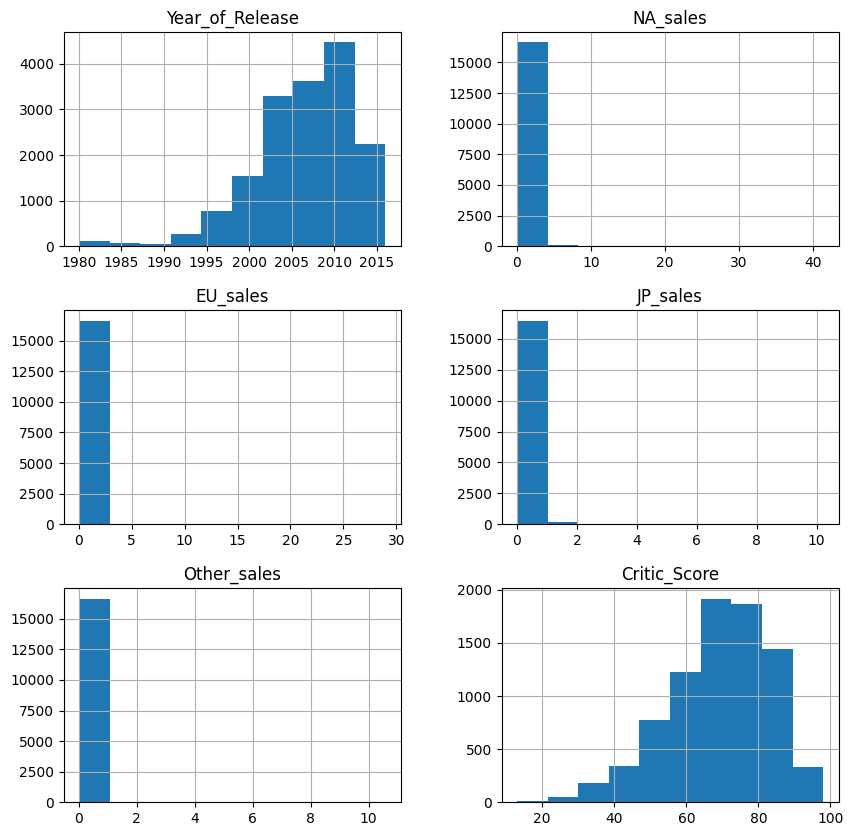

In [5]:
data.hist(figsize=(10,10)); #гистограммы столбцов

**Вывод:**  Ознакомились с данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами. Общее количество предоставленных игр - 16715. Однако в данных присутстуют пропущенные значения и некорректные типы данных.

### 2. Предобработка данных
<a id='intro1'> </a>

**Замена названий столбцов:**

In [6]:
data.columns = data.columns.str.lower() #замена регистра

**Преобразование типов данных и обработка пропусков:**

In [7]:
data.isna().sum() #количество пропусков по столбцам

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Подробнее рассмотрим пропуски в названии игр:

In [8]:
data[data['name'].isna()] # строки с пропусками названия игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Названия логично восстановить не получится, поэтому для дальнейшего анализа данных исключим данные строки:

In [9]:
data = data.dropna(subset=['name']).reset_index(drop=True) #исключаем строки с пропуском в названии игр

Обратим внимание, что в этих же строках отсутствует указание жанра игры! Таким образом мы исключили пропуски и в столбце с указанием жанра игры. Далее подробнее  рассмотрим пропуски в указании даты выхода игры:

In [10]:
data[data['year_of_release'].isna()] #строки с пропусками года выпуска игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Логично было предположить, что в некоторых названиях игр указан год выпуска игры, однако сначала проверим эту информацию:
    год релиза игры "Madden NFL 2004" - 2003, "FIFA Soccer 2004" - 2003, wwe Smackdown vs. Raw 2006" - 2005
    и вот вроде намечается зависимость, но год релиза игры "PDC World Championship Darts 2008" - 2008!
    Поэтому чтобы не искажать данные, необходимо исключить данные строки из датасета

In [11]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) #исключаем данные без указания года выпуска

In [12]:
sorted(data['year_of_release'].unique()) #уникальные значения столбца года выпуска по возрастанию

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [13]:
#приводим столбец с указанием года выпуска игры в целочисленный тип данных, пропуски игнорируем 
data['year_of_release'] = data['year_of_release'].astype('int')

Далее подробнее рассмотрим пропуски в оценках критиков: 

In [14]:
data[data['critic_score'].isna()] # строки с пропусками в указании оценок критиков

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим, сколько игр имеют пропуски не только в оценке критиков, но и также в оценке пользователей и рейтинга:

In [15]:
data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Большинство пропусков в оценках критиков совпадает с пропусками оценок пользователей и рейтинга. Есть предположение, что большинство пропущенных значений - игры, которые вышли или давно (когда еще не так были распространены данные оценки) или слишком недавно (и их еще не успели оценить).

In [16]:
data['critic_score'].unique() #уникальные значения оценок критиков

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Оценки критиков принимают только целочисленные значения. Для корректного изменения типа данных и дальнейших расчетов пропуски в оценках критиков заменим на медианное значение.

In [17]:
data['critic_score'] = data['critic_score'].astype('Int64') #меняем тип данных оценок критиков на целочисленный

Далее подробнее рассмотрим пропуски в оценке пользователей:

In [18]:
data['user_score'].unique() #уникальные значения оценок пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значения оценок пользователей - вещественный тип данных, за исключением пропусков и значений tbd. Рассмотрим подробнее игры с указанием в оценке пользователей значения tbd:

In [19]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков. Поэтому поступим со строками, где в оценках пользователя стоит tbd, аналогичным образом, как и с пропусками:

In [20]:
#преобразуем тип данных оценок пользователей в вещественный и меняем значение tbd на NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Заполнить логично пропуски в указании рейтинга не получится, при этом и удалить строки не лучшее решение, так как это большая часть предоставленных данных. В данном случае заменим отуствующие значения на значение "not defined"

In [21]:
data['rating'] = data['rating'].fillna('not defined')

Проверим наличие пропусков и получившиеся типы данных:

In [22]:
data.info() #общая инфрмация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(5), int32(1), object(4)
memory usage: 1.3+ MB


**Поиск дубликатов и аномальных значений**

In [23]:
data.duplicated().sum() #поиск явных дубликатов

0

Для поиска аномальных значений посмотрим уникальные значения столбцов (столбцы с указанием года выпуска, оценками критиков и пользователей проверили в предыдущем пункте). Однако со столбцом с именами игр возникает сложность, так как уникальных значений слишком много для корректного визуального поиска, поэтому ограничемся тем, что посмотрим количество уникальных значений этого столбца

In [24]:
data['name'].unique().shape #количество уникальных наименований игр

(11426,)

Наименования игр повторяются, но при этом явных дубликатов нет, выясним, почему появляются повторения:

In [25]:
# пройдемся по всем наименованиям игр и создадим список с повторяющимися названиями игр
name_new = []
name_duplicated = []
for i in data['name']:
    if i not in name_new:
        name_new.append(i)
    else:
        name_duplicated.append(i)

In [26]:
data[data['name'] == name_duplicated[0]] #посмотрим строки с одинаковыми наименованиями игр

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M
1710,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96,7.9,M


Значит, некоторые наименования игр повторяются, так как они выпускаются на разных платформах.

In [27]:
data['platform'].unique() #уникальные значения столбца с указанием платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
data['genre'].unique() #уникальные значения жанров игр

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [29]:
sorted(data['na_sales'].unique()) #уникальные значения продаж в Северной Америке

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.42,
 1.43,
 1.44,


In [30]:
sorted(data['eu_sales'].unique()) #уникальные значения продаж в Европе

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.42,
 1.43,
 1.44,


In [31]:
sorted(data['jp_sales'].unique()) #уникальные значения продаж в Японии

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.42,
 1.44,
 1.45,
 1.46,
 1.48,
 1.49,


In [32]:
sorted(data['other_sales'].unique()) #уникальные значения продаж в других странах

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.06,
 1.08,
 1.09,
 1.11,
 1.12,
 1.13,
 1.16,
 1.18,
 1.21,
 1.23,
 1.25,
 1.28,
 1.3,
 1.32,
 1.33,
 1.36,
 1.37,
 1.39,
 1.41,
 1.48,
 1.51,
 1.57,
 1.6,
 1.61,
 1.67,
 1.68,
 1.69,
 1.73,
 1.74,
 1.77,
 1.78,
 1.79,
 1.82,
 1.9,
 1.93,
 1.97,
 2.04,
 2.05,
 2.11,
 2.15,
 2.24,
 2.38,
 2.42,
 2.46,

In [33]:
data['rating'].unique() #уникальные значения рейтинга

array(['E', 'not defined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Аномальных значений в столбцах не обнаружено, однако в столбце с указанием рейтинга есть рейтинг "К-А", который означает тоже самое, что и рейтинг "Е". 

In [34]:
data.pivot_table(index='rating', values='name', aggfunc='count')

,name
rating,
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905
not defined,6676


Малочисленные категории: АО, EC, K-A, RP.

    АО - "Только для взрослых" присединим к M - "Для взрослых"
    EC - "Для детей младшего возраста" присоединим к Е - "Для всех"
    K-A - присоединим к Е - "Для всех", так как это вообще одно и тоже
    RP - "Рейтинг ожидается" присоединим к not defined

In [35]:
data.loc[data['rating']=='AO', 'rating'] = 'M'
data.loc[data['rating']=='EC', 'rating'] = 'E'
data.loc[data['rating']=='K-A', 'rating'] = 'E'
data.loc[data['rating']=='RP', 'rating'] = 'not defined'

**Добавление столбца с указанием суммарных продаж игр во всех регионах**

In [36]:
#добавляем столбец с указанием суммарных продаж
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Выводы:** 

    1. изменены названия столбцов на корректные
    2. строки, с пропущенными значениями в столбцах с наименованием игр, годом выпуска и жанром - исключены
    3. определили, что значение tbd, встречающееся в столбце с оценками пользователей, является аналогией пропуска
    4. пропущенные значения оценок критиков и пользователей были заменены на медианные
    5. пропуски в указании рейтинга заменили на метку "not defined"
    6. изменили типы данных следующих столбцов:указание даты выхода - на целочисленный, оценок критиков - на целочиленный, оценок пользователей - на вещественный
    7.явных дубликатов в данных не выявлено
    8. в столбце с указание рейтинга выявлены и устранены дублирующиеся значения "К-А" и "Е"
    9. аномальных значений не выявлено
    10. добавлен столбец с указанием суммарных продаж игр

### 3. Исследовательский анализ данных
<a id='intro2'> </a>

#### 3.1. Определение количества игр, выпускаемых в разные годы

In [37]:
data.pivot_table(index=['year_of_release'], values='name', aggfunc='count') #количество игр, выпускаемых в разные годы

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Вывод: Количество игр, выпускаемых с 1980 по 2008 год увеличивалось, затем начало уменьшаться. С 2012 по 2016 наблюдается небольшая разница в количестве выпускаемх игр в год.

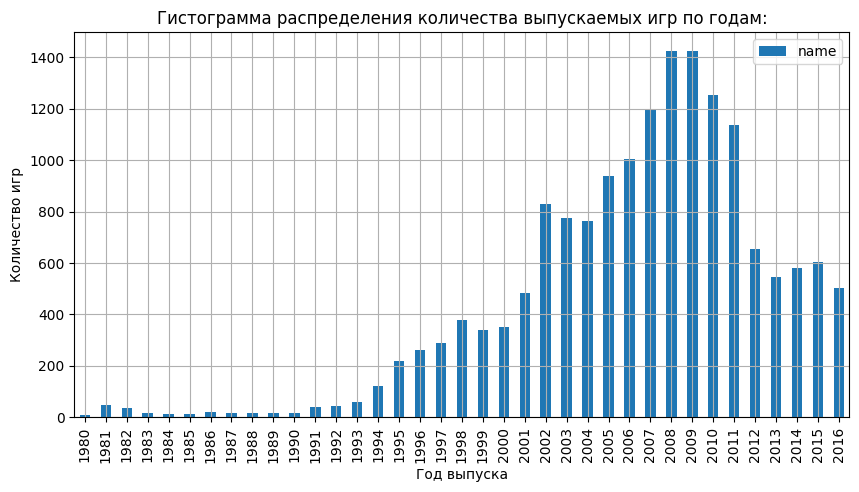

In [38]:
#гистограмма распределение количества выпускаемых игр по годам
ax = (data
     .pivot_table(index='year_of_release', values='name', aggfunc='count')
     .plot(grid=True, kind='bar', sharex=False, figsize=(10,5))
);
ax.set_title('Гистограмма распределения количества выпускаемых игр по годам:')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
plt.show()

#### 3.2. Выявление платформы с наибольшими суммарными продажами

In [39]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum') #сводная таблица общих продаж по платформам

,total_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


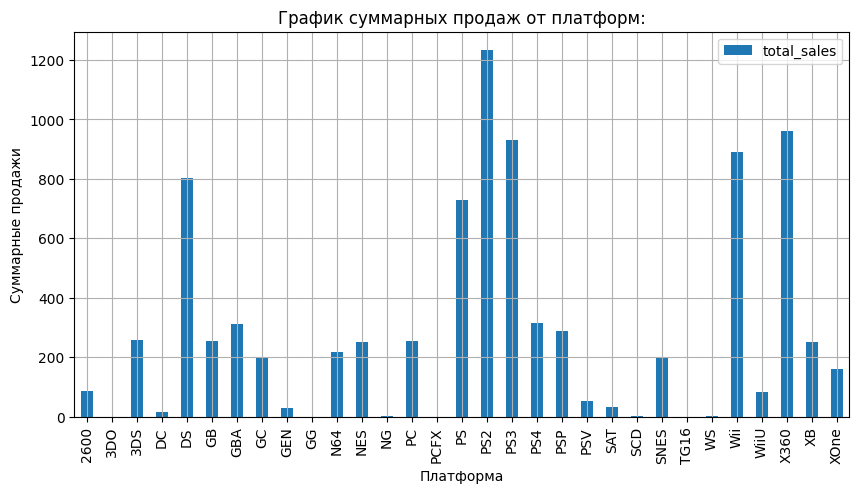

In [40]:
# сгуппируем данные о суммарных продажах по платформам и посторим соответствующий график:
ax = (data
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .plot(grid=True, kind='bar', sharex=False, figsize=(10,5)) 
);
ax.set_title('График суммарных продаж от платформ:')
ax.set_xlabel('Платформа')
ax.set_ylabel('Суммарные продажи')
plt.show()

Создадим список platform_total_sales платформ с наибольшими суммарными продажами:

In [41]:
# сохраним в переменную platform_total_sales сводную таблицу о суммарных продажах по платформам
platform_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
#затем в эту же переменную сохраним сводную таблицу по платформам, общая сумма продаж которых составляет более 300 
platform_total_sales = platform_total_sales[platform_total_sales['total_sales']>300]

Построим распределение суммарных продаж платформ из списка platform_total_sales по годам:

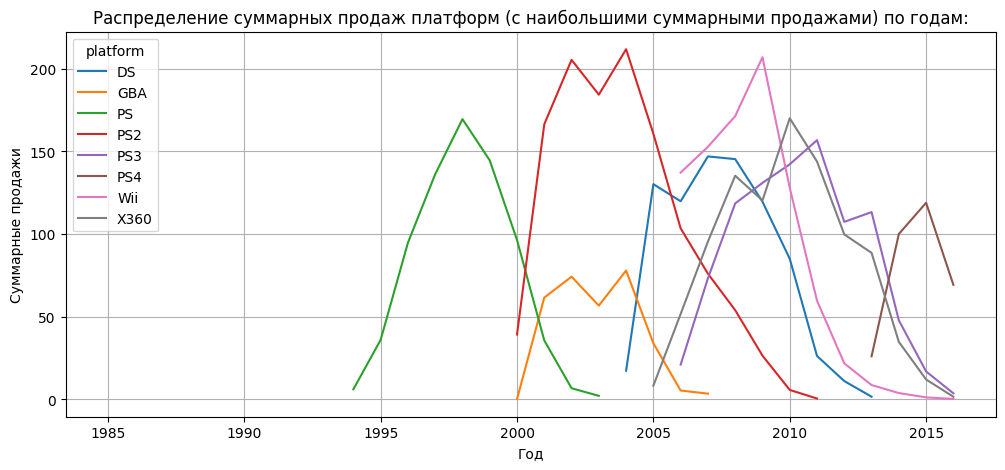

In [42]:
ax = (data
          .query('platform in @platform_total_sales.index')
          .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
          .plot(grid=True, figsize=(12,5))
      );
ax.set_title('Распределение суммарных продаж платформ (с наибольшими суммарными продажами) по годам:')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи')
plt.show()

Вывод: Для платформ с наибольшими суммарными продажами наблюдается появление новых платформ каждые 5 лет. При этом для каждой платформы наблюдаетя увеличение количества продаж в первые 5 лет ее жизни, затем достигается пик, затем количество продаж начинает уменьшаться

In [43]:
#сводная таблица суммарных продаж платформ из списка platform_total_sales по годам:
(data
     .query('platform in @platform_total_sales.index')
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

platform,DS,GBA,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN
2000,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN
2001,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN


Платформа DS появилась в 2004 году и игры выпускались до 2014 года (что соответствует данным, приведенным в таблице). Однако есть данные о продажах в 1985 году. Посмотрим внимательнее на эту игру (игры):

In [44]:
data[(data['platform']=='DS') & (data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,not defined,0.02


Данная игра была выпущена в 2010 году, так что исправим данную аномалию:

In [45]:
data.loc[(data['platform']=='DS') & (data['year_of_release']==1985), 'year_of_release'] = 2010

Построим распределение суммарных продаж платформ из списка platform_total_sales по годам:

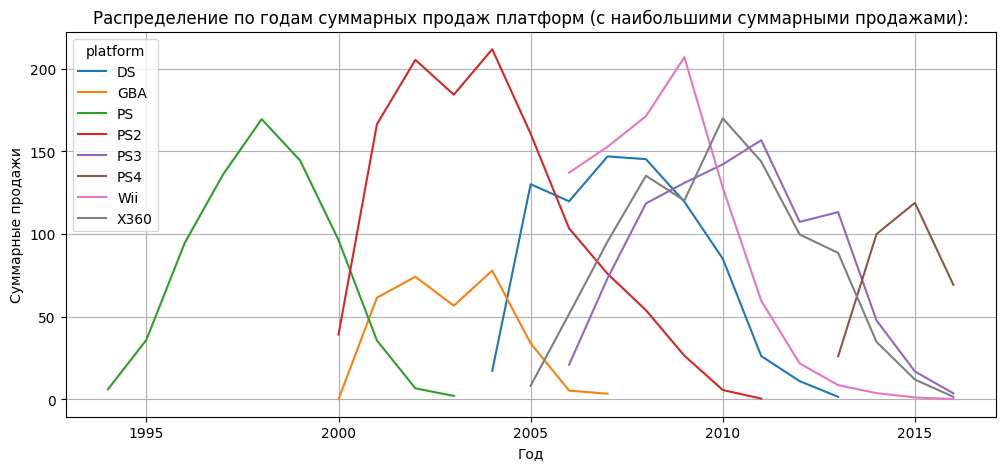

In [46]:
ax = (data
          .query('platform in @platform_total_sales.index')
          .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
          .plot(grid=True, figsize=(12,5))
      );
ax.set_title('Распределение по годам суммарных продаж платформ (с наибольшими суммарными продажами):')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи')
plt.show()

### 3.3. Определение характерного срока, за который появляются новые и исчезают старые платформы

Далее создадим таблицу lifetime_platform, содержащую следующую информацию по платформам с наибольшими суммарными продажами: год выпуска первой игры, год выпуска последней игры и продолжительность жизни платформы

In [47]:
#сводная таблица с указание года выпуска первой игры и года выпуска последней игры
lifetime_platform = (data
                         .query('platform in @platform_total_sales.index')
                         .sort_values(by='year_of_release')
                         .pivot_table(index='platform', values='year_of_release', aggfunc=['first', 'last'])
                     )
#переименуем столбцы для удобства
lifetime_platform.columns=['first_year_of_release', 'last_year_of_release']
#добавим столбец с укзанием продолжительности жизни платформы
lifetime_platform['lifetime'] = lifetime_platform['last_year_of_release']-lifetime_platform['first_year_of_release']+1
lifetime_platform.sort_values(by='first_year_of_release')

,first_year_of_release,last_year_of_release,lifetime
platform,,,
PS,1994,2003,10
GBA,2000,2007,8
PS2,2000,2011,12
DS,2004,2013,10
X360,2005,2016,12
PS3,2006,2016,11
Wii,2006,2016,11
PS4,2013,2016,4


На основе сводной таблицы и графика распределения по годам суммарных продаж по платформам с наибольшими суммарными продажами можно сделать вывод, что характерный срок появления новых платформ около 5 лет, а срок жизни платформы около 10-12 лет.

### 3.4. Определить актуальный период для построение прогноза на 2017 год

На основе исследования предыдущих вопросов логично было бы предложить рассматривать актуальный период как 2012-2016 года. Одна рассмотрим внимательнее продажи по платформам за данный период:

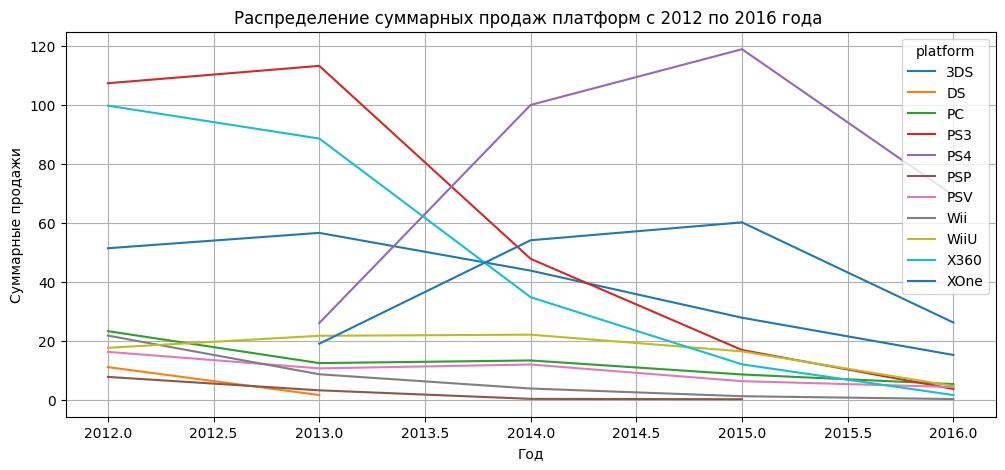

In [48]:
ax = (data
          .query('year_of_release>2011')
          .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
          .plot(grid=True, figsize=(12,5))
      );
ax.set_title('Распределение суммарных продаж платформ c 2012 по 2016 года ')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи')
plt.show()

Для детального анализа выделим 7 платформ с наибольшими суммарными продажами за период с 2012 по 2016 года и построим для них распределение суммарных продаж по годам

In [49]:
# определим 7 платформ с наибольшими суммарными продажами за период с 2012 по 2016 года:
platform_total_sales_2012_2016 = (data
                                      .query('year_of_release>2011')
                                      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                                      .sort_values(by='total_sales', ascending=False)
                                      .head(7)
                                   )

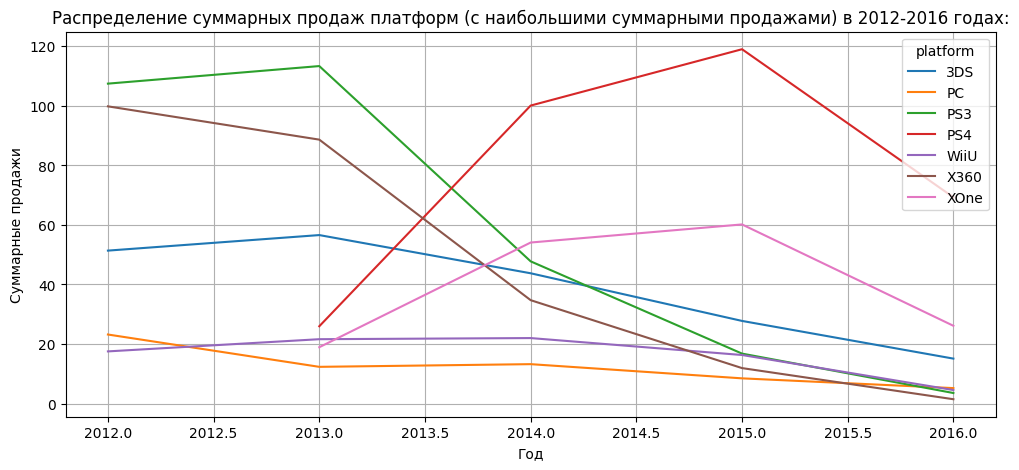

In [50]:
# график:
ax = (data
          .query('platform in @platform_total_sales_2012_2016.index and year_of_release>2011')
          .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
          .plot(grid=True, figsize=(12,5))
      );
ax.set_title('Распределение суммарных продаж платформ (с наибольшими суммарными продажами) в 2012-2016 годах:')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи')
plt.show()

Вывод: Для прогноза продаж в 2017 году необходимо сократить актуальный период до 2015-2016 годов, так как в указанный период не попадают платформы, для которых выпуск игр уже завершен, а также для самых популярных платформ наблюдается стабильное уменьшение количества продаж.

### 3.5. Выбор нескольких потенциально прибыльных платформ

In [51]:
data = data.query('year_of_release>2012')

In [52]:
#сводная таблица по суммарным продажам по годам и по платформам
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Построим график, отражающий данные сводной таблицы:

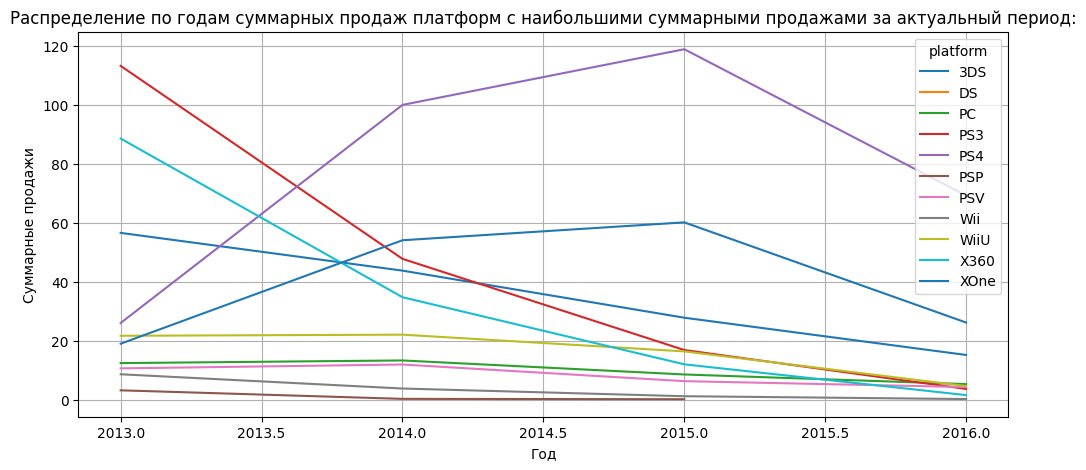

In [53]:
ax = (data
          .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
          .plot(grid=True, figsize=(12,5))
);
ax.set_title('Распределение по годам суммарных продаж платформ с наибольшими суммарными продажами за актуальный период:')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи')
plt.show()

Вывод: Платформы, лидирующие по продажам: PS4, XOne и 3DS. Однако из графика видно, что их продажи падают.

Построим диаграммы размаха (ящики с усами) по глобальным продажам игр в разбивке по платформам:

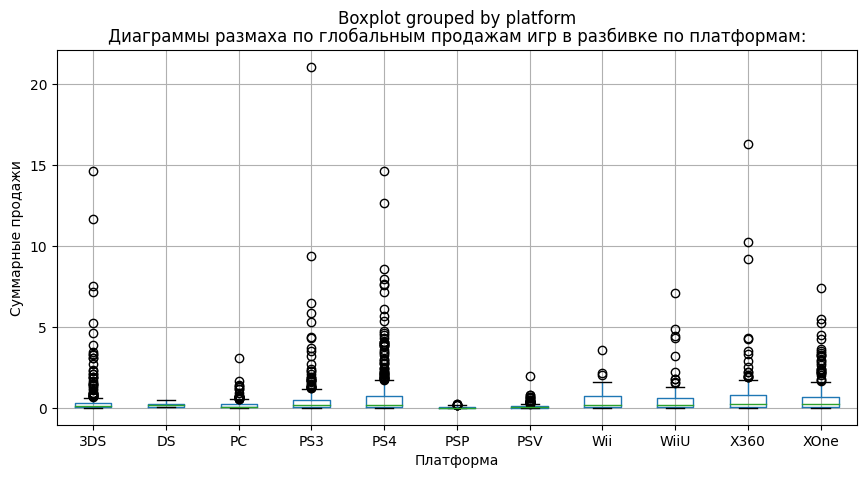

In [54]:
ax = data.boxplot(column='total_sales', by='platform', figsize=(10,5));
ax.set_title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам:')
ax.set_xlabel('Платформа')
ax.set_ylabel('Суммарные продажи')
plt.show()

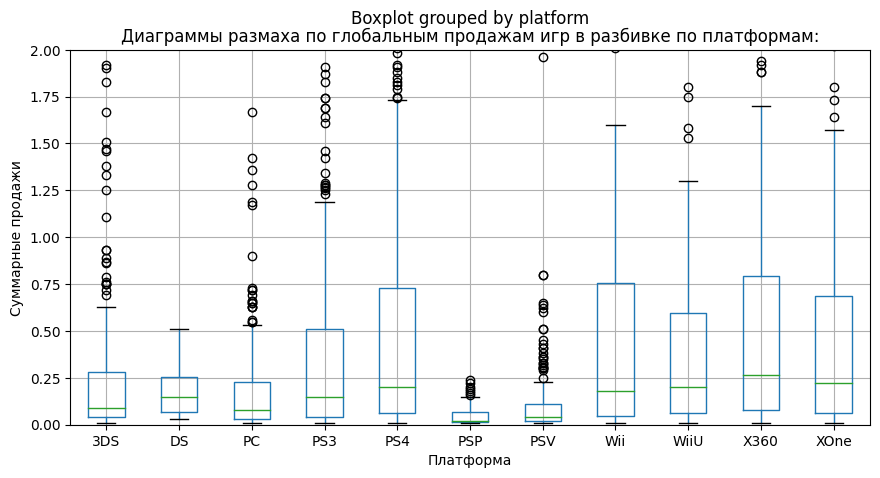

In [55]:
#рассмотрим ближе сами ящики:
ax = data.boxplot(column='total_sales', by='platform', figsize=(10,5))
ax.set(ylim=(0,2))
ax.set_title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам:')
ax.set_xlabel('Платформа')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [56]:
#медианные значения сумарных продаж по платформам
data.pivot_table(index='platform', values='total_sales', aggfunc='median').sort_values(by='total_sales')

,total_sales
platform,
PSP,0.020
PSV,0.040
PC,0.080
3DS,0.090
PS3,0.150
DS,0.150
Wii,0.180
PS4,0.200
WiiU,0.200


Выводы:
    
    1. Самые большие выбросы (а это означает наличие очень успешных игр) наблюдаются у платформ PS3, PS4, 3DS, X360.
    2. Платформы с самыми большими межвартильными размахами (что означает, что большая часть игр достаточно успешные) - X360, PS4, Wii, XOne, WiiU.
    3. Платформы с большими медианами (что означает, что половина игр, выпускаемых для данной платформы более успешна) - X360, XOne, WiiU, PS4.
   
На основе этих данных можно скорректировать перечень перспективных платформ: PS4, XOne, 3DS, X360, WiiU, PC.

## 3.6. Определить, влияют ли на продажи отзывы пользователей и критиков

**Посмотрим, как влияют на продажи внутри одной популярной платформы, а именно PS4, отзывы пользователей и критиков:**

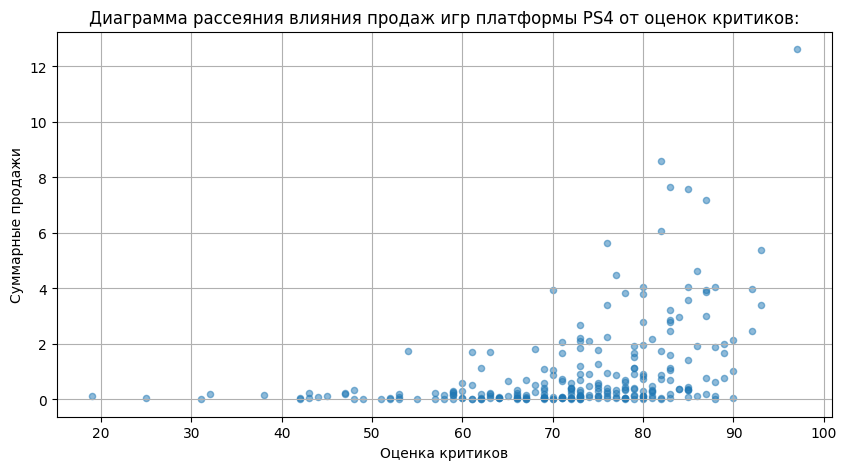

In [57]:
#построим диаграмму рассеяния влияния продаж игр платформы PS4 от оценок критиков: 
ax = data[data['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', \
                                   alpha=0.5, grid=True, figsize=(10, 5), sharex=False);
ax.set_title('Диаграмма рассеяния влияния продаж игр платформы PS4 от оценок критиков:')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [58]:
data['critic_score'] = data['critic_score'].astype('float') #иначе не считался коэффициент корреляции

In [59]:
# посчитаем корреляцию между продажами и оценками критиков:
data.loc[data['platform']=='PS4', 'total_sales'].corr(data.loc[data['platform']=='PS4', 'critic_score'])

0.4065679020617816

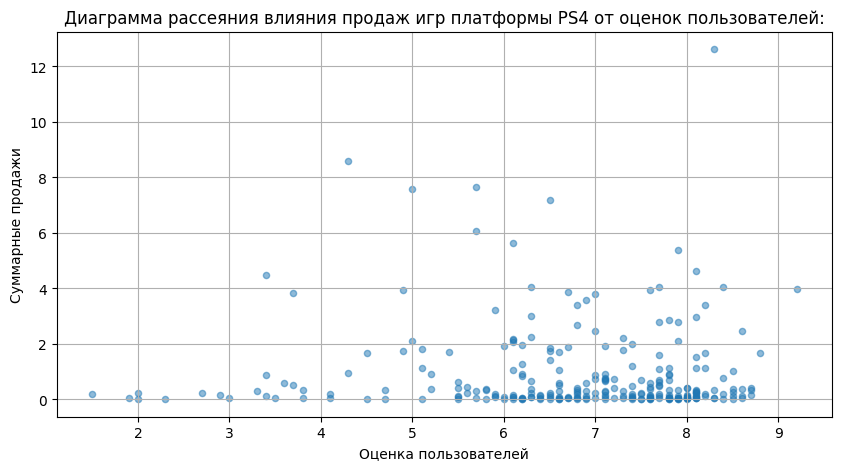

In [60]:
#построим диаграмму рассеяния влияния продаж игр платформы PS4 от оценок пользователей: 
ax = data[data['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, figsize=(10, 5), \
                                   sharex=False);
ax.set_title('Диаграмма рассеяния влияния продаж игр платформы PS4 от оценок пользователей:')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [61]:
# посчитаем корреляцию между продажами и оценками пользователей:
data.loc[data['platform']=='PS4', 'total_sales'].corr(data.loc[data['platform']=='PS4', 'user_score'])

-0.03195711020455643

Выводы:

    1. Большинство игр имеют положительную оценку критиков и пользователей.
    2. По графику определить зависимость продаж от оценок критиков невозможно. Однако самые продаваемые игры имели оценку критиков выше 60.
    3. Между продажами игр и оценками критиков установлена слабая положительная корреляция (коээфициент Пирсона = 0.295)
    4. По графику определить зависимость продаж от оценок пользователей невозможно.
    Между продажами игр и оценками критиков установлена слабая положительная корреляция (коээфициент Пирсона = 0.295)
    5. Между продажами игр и оценками пользователей практически отсутствует корреляция (коэффициент Пирсона = -0.0676)

**Вывод: явной зависимости объема продаж по платформам от оценок критиков и пользователей не выявлено.**

**Проведем аналогичное исследование для платформы XOne:**

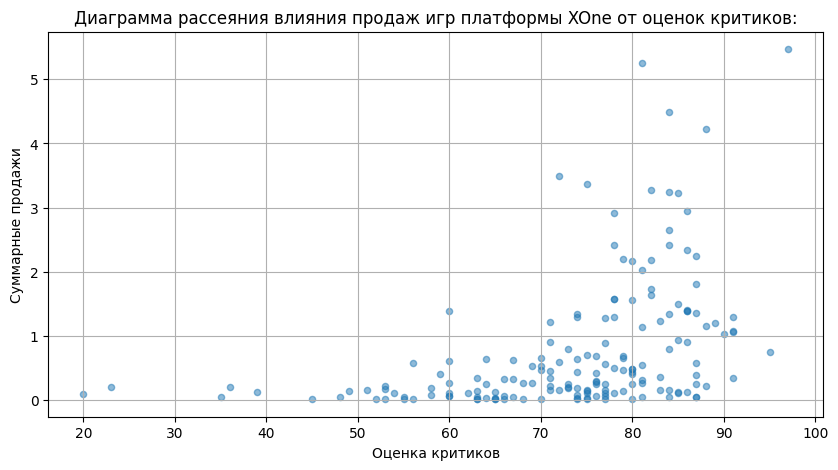

In [62]:
#построим диаграмму рассеяния влияния продаж игр платформы XOne от оценок критиков: 
ax = data[data['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter', \
                                   alpha=0.5, grid=True, figsize=(10, 5), sharex=False);
ax.set_title('Диаграмма рассеяния влияния продаж игр платформы XOne от оценок критиков:')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [63]:
# посчитаем корреляцию между продажами и оценками критиков:
data.loc[data['platform']=='XOne', 'total_sales'].corr(data.loc[data['platform']=='XOne', 'critic_score'])

0.41699832800840164

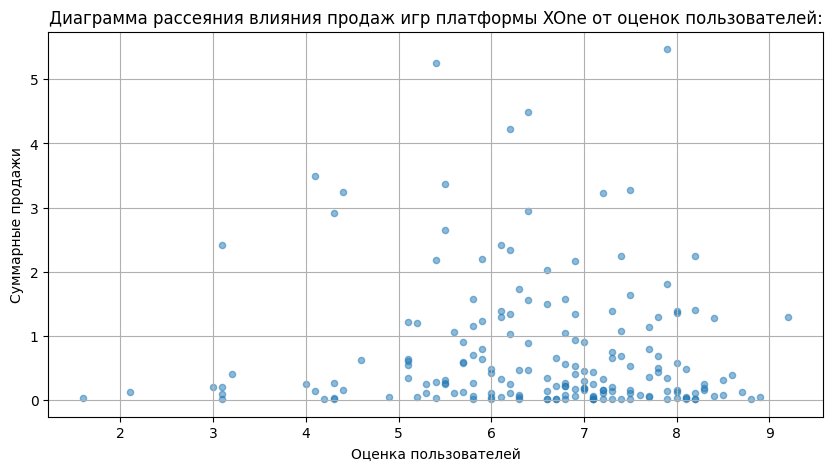

In [64]:
#построим диаграмму рассеяния влияния продаж игр платформы XOne от оценок пользователей: 
ax = data[data['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, figsize=(10, 5), \
                                   sharex=False);
ax.set_title('Диаграмма рассеяния влияния продаж игр платформы XOne от оценок пользователей:')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [65]:
# посчитаем корреляцию между продажами и оценками пользователей:
data.loc[data['platform']=='XOne', 'total_sales'].corr(data.loc[data['platform']=='XOne', 'user_score'])

-0.06892505328279415

**Проведем аналогичное исследование для платформы 3DS:**

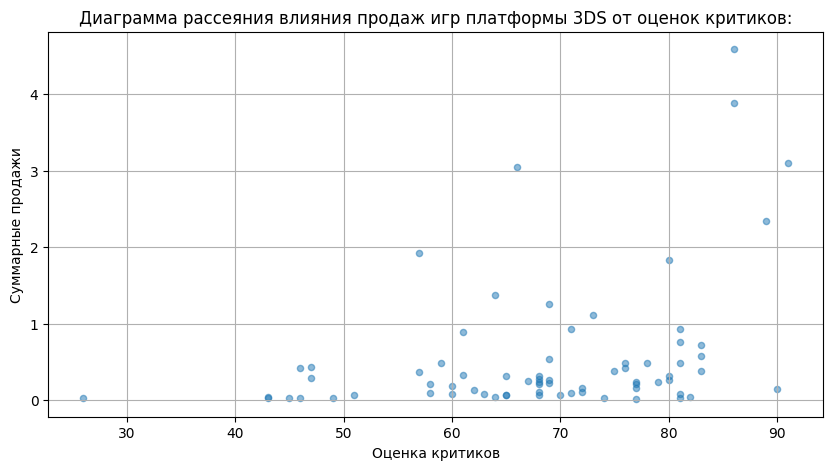

In [66]:
#построим диаграмму рассеяния влияния продаж игр платформы 3DS от оценок критиков: 
ax = data[data['platform']=='3DS'].plot(x='critic_score', y='total_sales', kind='scatter', \
                                   alpha=0.5, grid=True, figsize=(10, 5), sharex=False);
ax.set_title('Диаграмма рассеяния влияния продаж игр платформы 3DS от оценок критиков:')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [67]:
# посчитаем корреляцию между продажами и оценками критиков:
data.loc[data['platform']=='3DS', 'total_sales'].corr(data.loc[data['platform']=='3DS', 'critic_score'])

0.35705661422881035

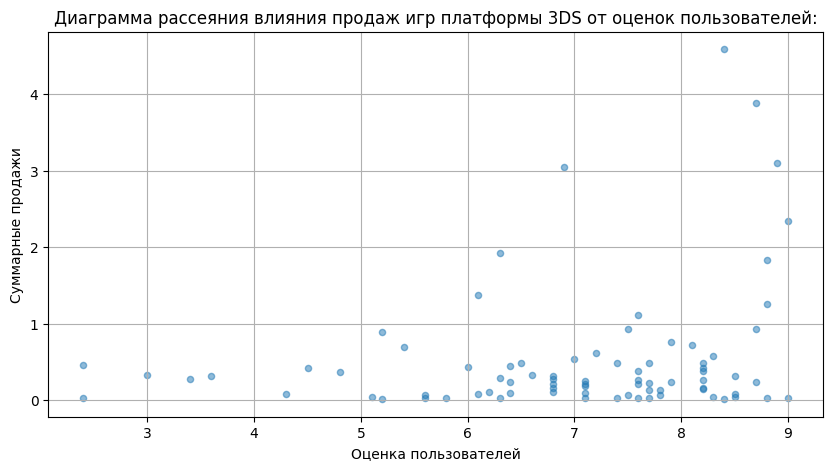

In [68]:
#построим диаграмму рассеяния влияния продаж игр платформы 3DS от оценок пользователей: 
ax = data[data['platform']=='3DS'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, figsize=(10, 5), \
                                   sharex=False);
ax.set_title('Диаграмма рассеяния влияния продаж игр платформы 3DS от оценок пользователей:')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [69]:
# посчитаем корреляцию между продажами и оценками пользователей:
data.loc[data['platform']=='3DS', 'total_sales'].corr(data.loc[data['platform']=='3DS', 'user_score'])

0.24150411773563016

In [70]:
data['critic_score'] = data['critic_score'].astype('Int64') #вернула

**Выводы:**

    1. Большинство игр имеют положительную оценку критиков и пользователей.
    2. По графикам заметно, что более успешные игры имели положительную оценку критиков. Прямой зависимости нет, но определенная зависимость прослеживается.
    3. Между продажами игр и оценками критиков установлена слабая положительная корреляция (коээфициент Пирсона около 0.4)
    4. По графикам определить зависимость продаж от оценок пользователей сложно (определенная положительная тенденция есть в исследовании для платформы 3DS только). Более успешные игры наблюдаются в "средних" пользовательсих оценках. 
    5. Между продажами игр и оценками пользователей практически отсутствует корреляция (коэффициент Пирсона меньше 0,1), исключением является платформа 3DS, там установлена слабя положительная корреляции.
    6. Оценки критиков и пользователей для платформ PS4 и XOne не коррелируют между собой, а вот графики для платформы 3DS достаточно похожие (да и коэффициенты корреляции не сильно отличаются).

### 3.7. Определить жанры с высокими и низкими продажами

**Рассмотрим общее распределение игр по жанрам:**

In [71]:
data.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum']) #сводная таблица 

,count,sum
,total_sales,total_sales
genre,,
Action,766,321.87
Adventure,245,23.64
Fighting,80,35.31
Misc,155,62.82
Platform,74,42.63
Puzzle,17,3.17
Racing,85,39.89
Role-Playing,292,145.89


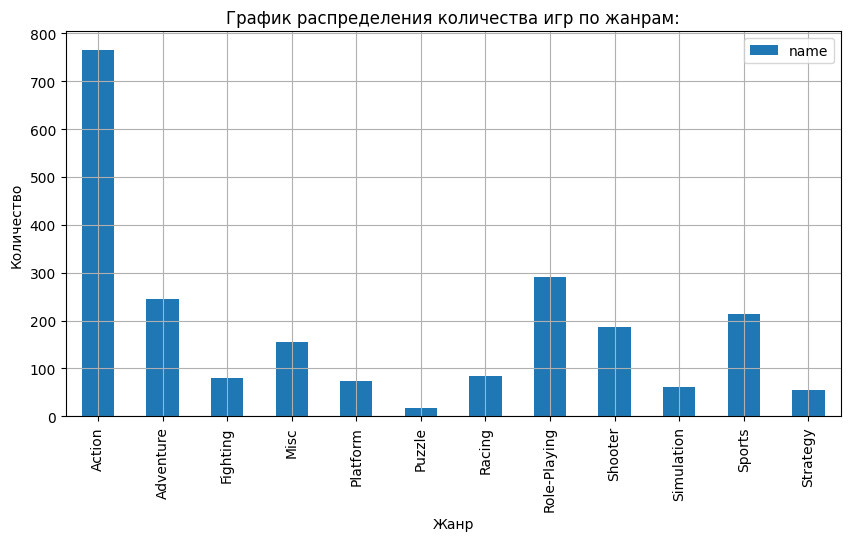

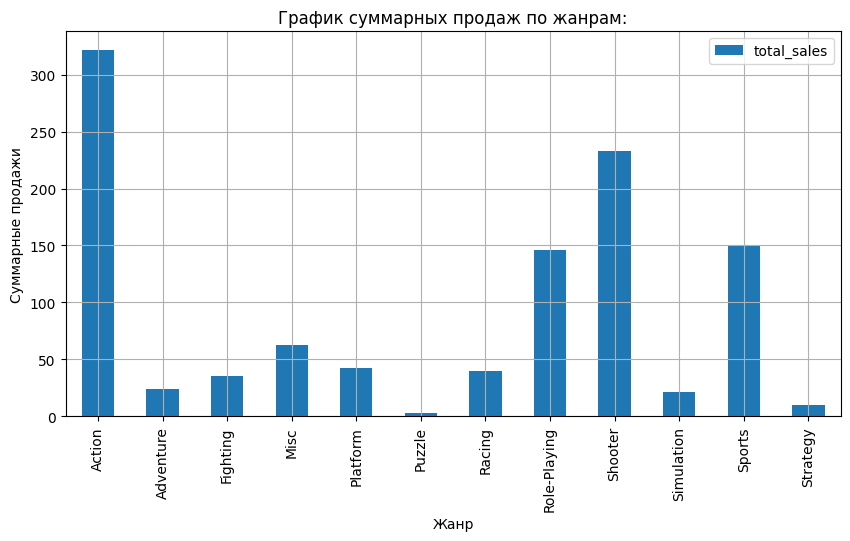

In [72]:
# сгуппируем данные о суммарных продажах по платформам и посторим соответствующий график:
(data
     .pivot_table(index='genre', values='name', aggfunc='count')
     .plot(grid=True, kind='bar',sharex=False, figsize=(10,5), title='График распределения количества игр по жанрам:',\
          xlabel='Жанр', ylabel='Количество') 
);
(data
     .pivot_table(index='genre', values='total_sales', aggfunc='sum')
     .plot(grid=True, kind='bar', sharex=False, figsize=(10,5), title='График суммарных продаж по жанрам:',\
          xlabel='Жанр', ylabel='Суммарные продажи') 
);
plt.show()

Выводы:

    1. Самое большое количество игр в жанре Action. Далее по количеству идут жанры Role-Playing, Sports и Adventure.
    2. Однако самое большое количество продаж игр в жанре Shooter. Немного ему уступает - Action. Далее идет Sports и Role-Playing.
    3. Жанры с низким количеством выпускаемых игр и количеством продаж - Puzzle и Strategy.

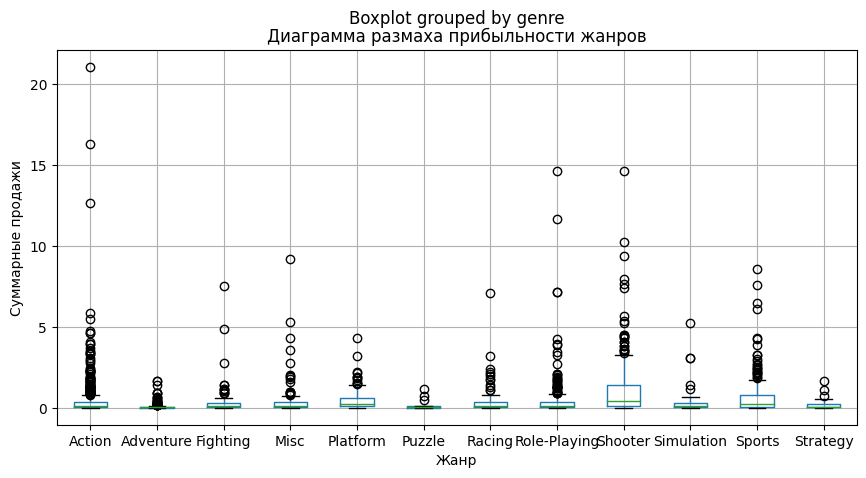

In [73]:
#для более детального изучения прибыльности жанров построим диаграмму размаха:
ax = data.boxplot(column='total_sales', by='genre', figsize=(10,5))
ax.set(title='Диаграмма размаха прибыльности жанров')
ax.set_xlabel('Жанр')
ax.set_ylabel('Суммарные продажи')
plt.show()

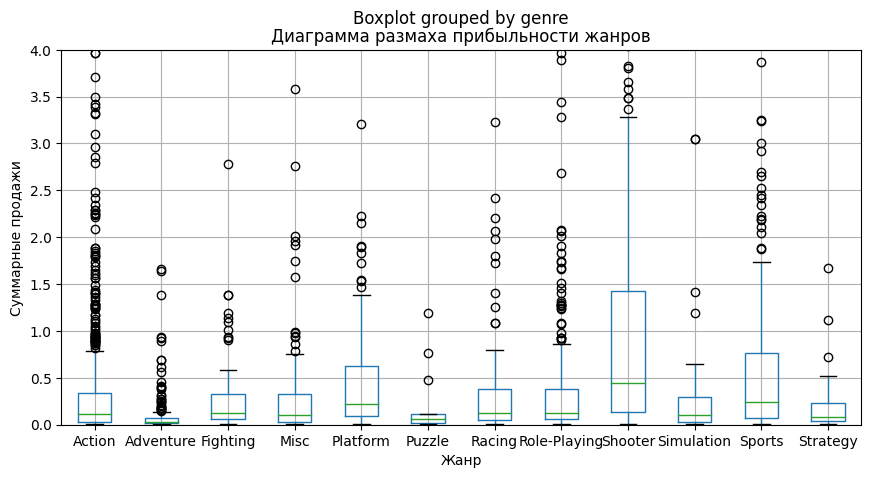

In [74]:
# изменим масштаб графика для более детального изучения межквартильных размахов и медиан:
ax = data.boxplot(column='total_sales', by='genre', figsize=(10,5))
ax.set(ylim=(0,4))
ax.set(title='Диаграмма размаха прибыльности жанров')
ax.set_xlabel('Жанр')
ax.set_ylabel('Суммарные продажи')
plt.show()

In [75]:
# медианные значения прибыльности игр для каждого жанра
data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Вывод:

    1) По суммарным продажам лидируют игры жанра Action, однако для для данного жанра характерно появление очень успешных нескольких игр (на графике видно, что большое количество "прибыльных" выбросов).
    2) Самым стабильно успешным жанром является Shooter: суммарные продажи уступают только Action, самая большая медиана и межквартильный размах (что означает, что большинство игр в данном жанре продается успешнее)
    3) Жанры с высокими продажами можно разделить на две группы:
    - жанры с большим количеством "успешных" выбросов - игр: Action, Role-Playing, Misc
    - жанры со стабильно хорошими продажами - Shooter, Sports, Platform
    4) Жанры с низкими продажами: Strategy, Puzzle. Также стоит отметить, что самая маленькая медиана у жанра Adventure, но суммарные продажи не самые низкие, потому что было выпущено несколько удачных игр (выбросов).

###  4. Составление портретов пользователей каждого региона
<a id='intro3'> </a>

**Самые популярные платформы (топ-5) для пользователей в Северной Америке:**

In [76]:
#выбираем топ-5 самых популярных платформ
na_user_platform_top = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
#добавляем столбец с указанием доли от общих продаж
na_user_platform_top['part'] = na_user_platform_top['na_sales']/data['na_sales'].sum()
display(na_user_platform_top)

,na_sales,part
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272


**Самые популярные платформы (топ-5) для пользователей в Европе:**

In [77]:
#выбираем топ-5 самых популярных платформ
eu_user_platform_top = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
#добавляем столбец с указанием доли от общих продаж
eu_user_platform_top['part'] = eu_user_platform_top['eu_sales']/data['eu_sales'].sum()
display(eu_user_platform_top)

,eu_sales,part
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933


**Самые популярные платформы (топ-5) для пользователей в Японии:**

In [78]:
#выбираем топ-5 самых популярных платформ
jp_user_platform_top = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
#добавляем столбец с указанием доли от общих продаж
jp_user_platform_top['part'] = jp_user_platform_top['jp_sales']/data['jp_sales'].sum()
display(jp_user_platform_top)

,jp_sales,part
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284


Вывод:
    
    1. Самой популярной платформой в Северной Америке является PS4. Далее идет XOne. Эти две платформы составляют большую часть продаж (0,42 и 0,33 от всех продаж соответственно). Также в топ популярных платформ попали 3DS, WiiU, X360 (но их доли незначительны и составляют около 0,05-0,06)
    2. Самой популярной платформой в Европе является PS4 (доля продаж составляет 0,54). Далее идет XOne (0,19 от всех продаж). Также в топ популярных платформ попали 3DS, PC, PS3 (но их доли незначительны и составляют около 0,05-0,06)
    3. Самой популярной платформой в Японии является 3DS (доля продаж составляет 0,44). Далее идут PS4 (0,23), PSV(0,16). Также в топ популярных платформ попали WiiU, PS3 (но их доли незначительны и составляют около 0,07-0,09)

**Самые популярные жанры (топ-5) для пользователей в Северной Америке:**

In [79]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


**Самые популярные жанры (топ-5) для пользователей в Европе:**

In [80]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


**Самые популярные жанры (топ-5) для пользователей в Японии:**

In [81]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Вывод:**
    
    1. Самым популярным жанром игры в Северной Америке является Shooter. Далее идут Action, Sports, Role-Playing. Также в топ популярных жанров попал Misc.
    2. Самым популярным жанром игры в Европе является Shooter. Далее идут Action, Sports, Role-Playing. Также в топ популярных жанров попал Racing.
    3. Самым популярным жанром игры в Японии является Action. Далее идет Role-Playing. Также в топ популярных жанров попали Shooter, Misc, Adventure.

Для того, чтобы на графике отображались только доли платформ, выходящих в ТОП-5, а остальные объединились в группу "Другие", создадим таблицу сводную таблицу по платформам по продажам в конкретном регионе и заменим значения, не входящие в ТОП-5, на "Другие".

In [82]:
# для пользователей из Северной Америки:
na_user_platform = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index() #сводная таблица
na_user_platform['platform'] = na_user_platform['platform'].where(na_user_platform['platform'] \
                                                                  .isin(na_user_platform_top.index), 'Другие') #замена на Другие
# для пользователей из Европы:
eu_user_platform = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index() #сводная таблица
eu_user_platform['platform'] = na_user_platform['platform'].where(eu_user_platform['platform'] \
                                                                  .isin(eu_user_platform_top.index), 'Другие') #замена на Другие
# для пользователей из Японии:
jp_user_platform = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index() #сводная таблица
jp_user_platform['platform'] = jp_user_platform['platform'].where(jp_user_platform['platform'] \
                                                                  .isin(jp_user_platform_top.index), 'Другие') #замена на Другие

Построим графики для ТОП-5 популярных платформ в зависимости от региона:

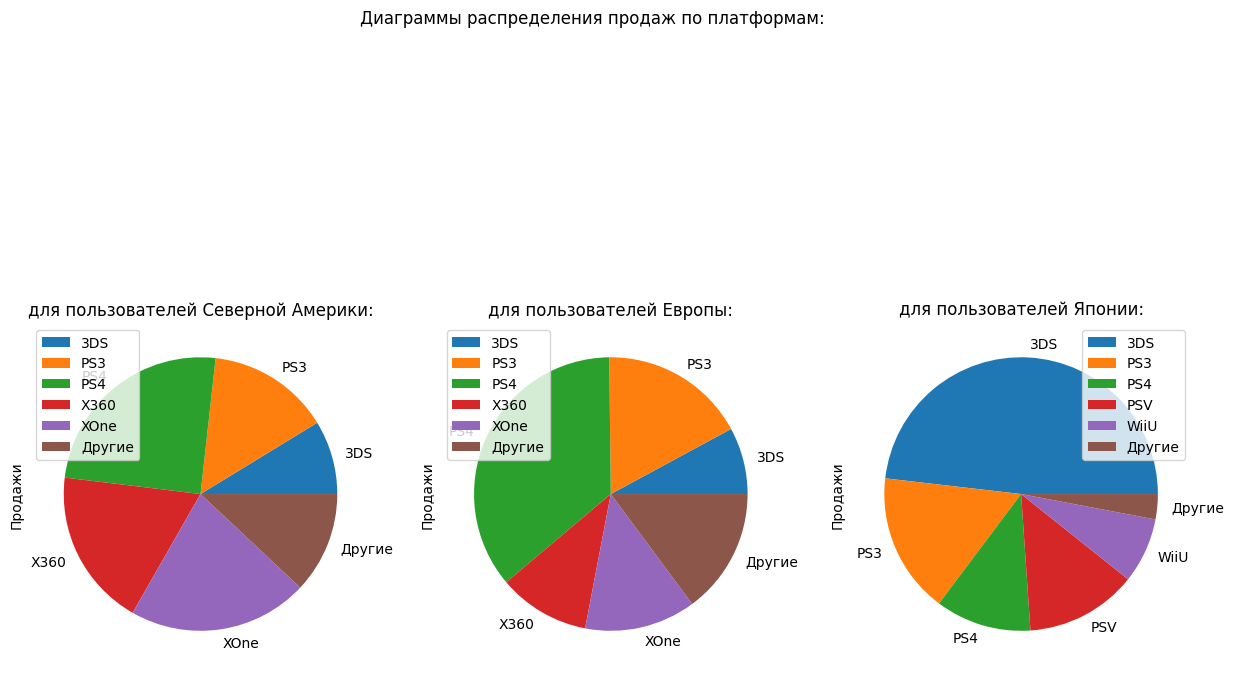

In [83]:
f, ax = plt.subplots(1, 3, figsize=(15,10))
f.suptitle('Диаграммы распределения продаж по платформам:')
ax[0] = (na_user_platform
                           .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                           .plot(y='na_sales', kind='pie', sharex=False, ax=ax[0]) 
          )
ax[1] = (eu_user_platform
                           .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                           .plot(y='eu_sales', kind='pie', sharex=False, ax=ax[1]) 
          )
ax[2] = (jp_user_platform
                           .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                           .plot(y='jp_sales', kind='pie', sharex=False, ax=ax[2]) 
          )
ax[0].set_title('для пользователей Северной Америки:')
ax[0].set_ylabel('Продажи')
ax[1].set_title('для пользователей Европы:')
ax[1].set_ylabel('Продажи')
ax[2].set_title('для пользователей Японии:')
ax[2].set_ylabel('Продажи')
plt.show()

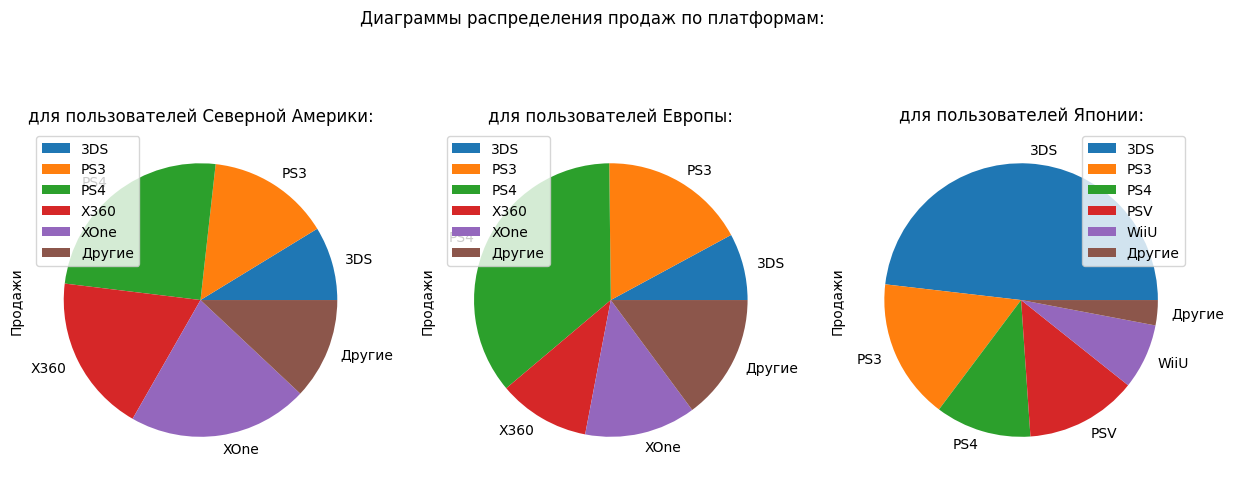

In [84]:
f, ax = plt.subplots(1, 3, figsize=(15,6))
f.suptitle('Диаграммы распределения продаж по платформам:')
ax[0] = (na_user_platform
                           .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                           .plot(y='na_sales', kind='pie', sharex=False, ax=ax[0]) 
          )
ax[1] = (eu_user_platform
                           .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                           .plot(y='eu_sales', kind='pie', sharex=False, ax=ax[1]) 
          )
ax[2] = (jp_user_platform
                           .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                           .plot(y='jp_sales', kind='pie', sharex=False, ax=ax[2]) 
          )
ax[0].set_title('для пользователей Северной Америки:')
ax[0].set_ylabel('Продажи')
ax[1].set_title('для пользователей Европы:')
ax[1].set_ylabel('Продажи')
ax[2].set_title('для пользователей Японии:')
ax[2].set_ylabel('Продажи')
plt.show()

**Вывод:**
    
    1. Самыми популярными платформами в Северной Америке являются PS4 и XOne. Далее идут X360 и PS3. Платформы, входящие в ТОП-5 составляют большую часть продаж.
    2. Самой популярной платформой в Европе является PS4 (доля продаж составляет 0,36). Далее идут PS3  и XOne. Платформы, входящие в ТОП-5 составляют большую часть продаж. 
    3. Самой популярной платформой в Японии является 3DS (доля продаж составляет 0,48). Далее идут PS3, PS4, PSV. Платформы, входящие в ТОП-5 составляют большую часть продаж.

Для того, чтобы на графике отображались только доли жанров, выходящих в ТОП-5, а остальные объединились в группу "Другие", создадим таблицу сводную таблицу по жанрам по продажам в конкретном регионе и заменим значения, не входящие в ТОП-5, на "Другие".

In [85]:
# для пользователей из Северной Америки:
na_user_genre_top = data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
                                                            .sort_values(by='na_sales', ascending=False).head() #фиксируем ТОП
na_user_genre = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index() #сводная таблица
na_user_genre['genre'] = na_user_genre['genre'].where(na_user_genre['genre'] \
                                                                  .isin(na_user_genre_top.index), 'Другие') #замена на Другие
# для пользователей из Европы:
eu_user_genre_top = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
                                                            .sort_values(by='eu_sales', ascending=False).head() #фиксируем ТОП
eu_user_genre = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index() #сводная таблица
eu_user_genre['genre'] = eu_user_genre['genre'].where(eu_user_genre['genre'] \
                                                                  .isin(eu_user_genre_top.index), 'Другие') #замена на Другие
# для пользователей из Японии:
jp_user_genre_top = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
                                                            .sort_values(by='jp_sales', ascending=False).head() #фиксируем ТОП
jp_user_genre = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index() #сводная таблица
jp_user_genre['genre'] = jp_user_genre['genre'].where(jp_user_genre['genre'] \
                                                                  .isin(jp_user_genre_top.index), 'Другие') #замена на Другие

Построим графики для ТОП-5 популярных жанров в зависимости от региона:

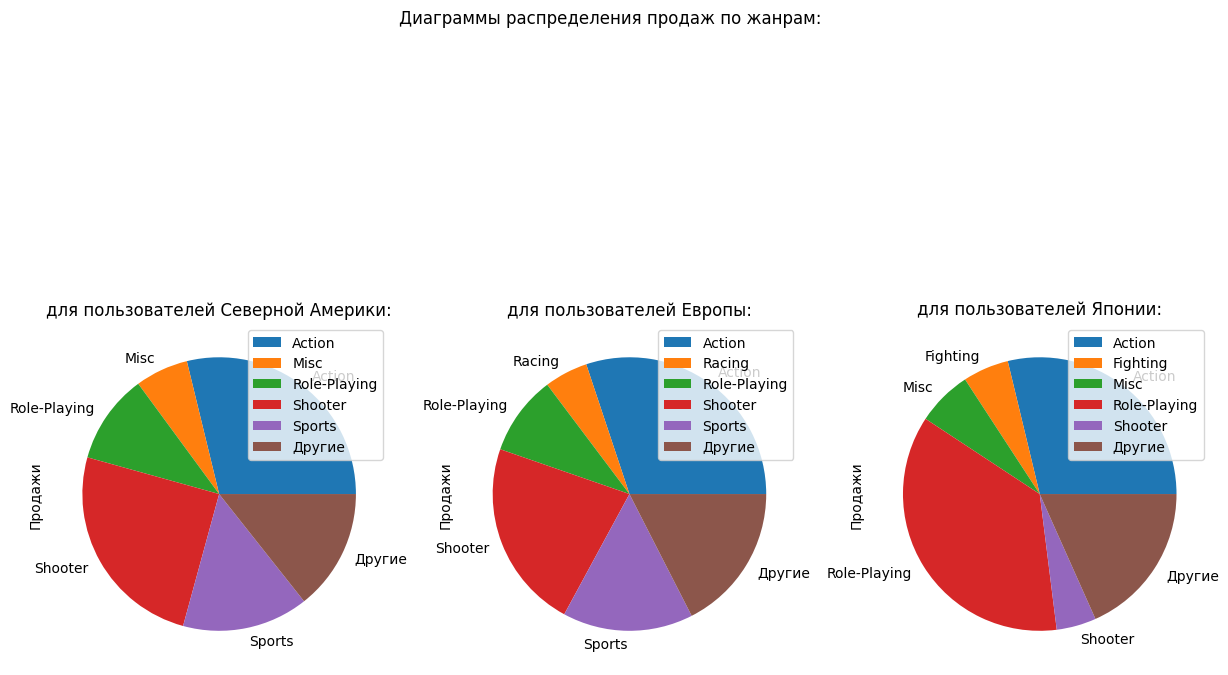

In [86]:
f, ax = plt.subplots(1, 3, figsize=(15,10))
f.suptitle('Диаграммы распределения продаж по жанрам:')
ax[0] = (na_user_genre
                      .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                      .plot(y='na_sales', kind='pie', sharex=False, ax=ax[0]) 
          )
ax[1] = (eu_user_genre
                      .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                      .plot(y='eu_sales', kind='pie', sharex=False, ax=ax[1]) 
          )
ax[2] = (jp_user_genre
                      .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                      .plot(y='jp_sales', kind='pie', sharex=False, ax=ax[2]) 
          )
ax[0].set_title('для пользователей Северной Америки:')
ax[0].set_ylabel('Продажи')
ax[1].set_title('для пользователей Европы:')
ax[1].set_ylabel('Продажи')
ax[2].set_title('для пользователей Японии:')
ax[2].set_ylabel('Продажи')
plt.show()

Вывод:

1. Самыми популярными жанрами игр в Северной Америке являются Action и Shooter. Далее идут Sports и Role-Playing. Также в топ популярных жанров попал Misc.
2. Самым популярным жанром игры в Европе является Action. Далее идут Shooter, Sports. Также в топ популярных жанров попали Role-Playing и Racing.
3. Самыми популярными жанрами игр в Японии являются Action и Role-Playing. Далее идет Role-Playing. Также в топ популярных жанров попали Shooter, Misc, Fighting.

**Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе:**

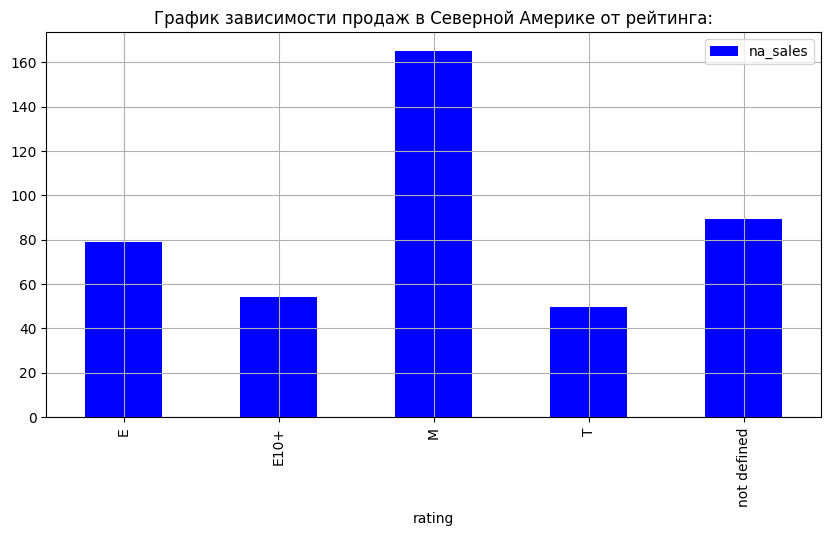

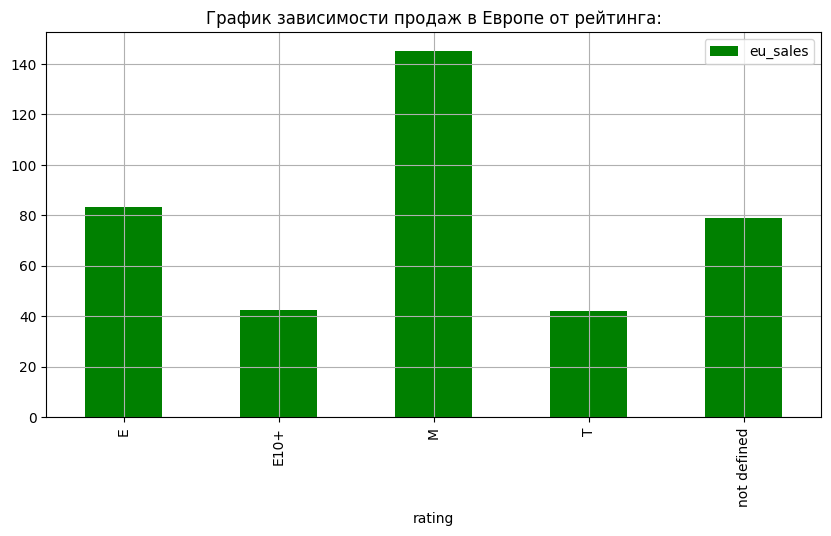

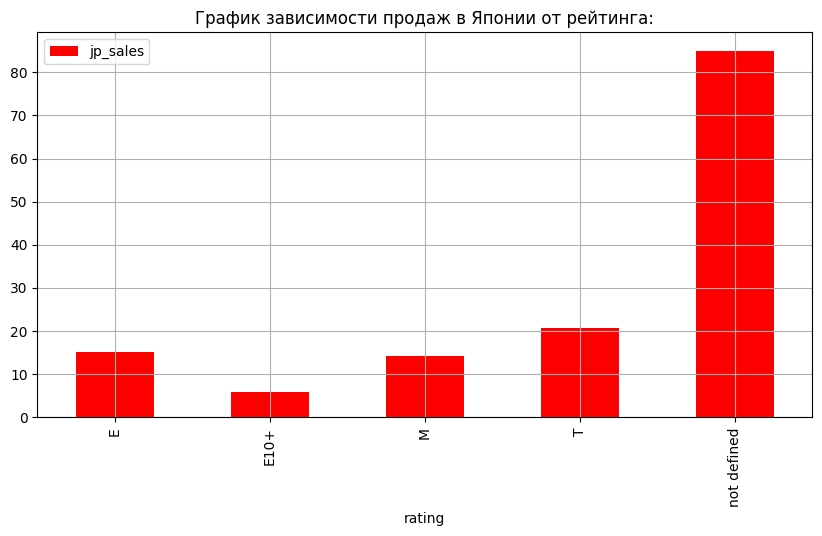

In [87]:
(data
     .pivot_table(index='rating', values='na_sales', aggfunc='sum')
     .plot(grid=True, kind='bar', sharex=False, figsize=(10,5), color='blue', title='График зависимости продаж в Северной Америке от рейтинга:') 
);
(data
     .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
     .plot(grid=True, kind='bar', sharex=False, figsize=(10,5), color='green', title='График зависимости продаж в Европе от рейтинга:') 
);
(data
     .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
     .plot(grid=True, kind='bar', sharex=False, figsize=(10,5), color='red', title='График зависимости продаж в Японии от рейтинга:') 
);
plt.show()

Выводы:
    
    1. Самыми популярными играми в Северной Америке является игры рейтинга M. Далее идут с рейтингами E, T, E10+.
    2. Самыми популярными играми в Европе является игры рейтинга M и Е. Далее идут с рейтингами T, E10+.
    3. Самыми популярными играми в Японии является игры рейтинга T. Далее идут с рейтингами E, M, E10+.
    4. Одако по каждому региону имеется большое количество игр, чей рейтинг не определен.
   

### 5. Проверка гипотез
<a id='intro4'> </a>

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

    Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
    Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"
    Пороговое значение: alpha=0.05

In [88]:
data.loc[data['platform']=='XOne', 'user_score'].shape # размер выборки для Xbox One

(247,)

In [89]:
data.loc[data['platform']=='PC', 'user_score'].shape # размер выборки для PC

(189,)

Далее будем рассматривать гипотезу о равенстве средних двух генеральных совокупностей. При этом учитываем, что выборки разного размера.

Для корректной проверки гипотез необходимо избавиться от пропуков в значениях столбца с оценками пользователей:

In [90]:
data['user_score'] = data['user_score'].fillna(-1)

In [91]:
display(data.loc[(data['platform']=='XOne')&(data['user_score']!=-1), 'user_score'].shape,\
        data.loc[(data['platform']=='PC')&(data['user_score']!=-1), 'user_score'].shape) #размеры выборок

(182,)

(155,)

In [92]:
alpha=0.05 #пороговое значение

result = st.ttest_ind(data.loc[(data['platform']=='XOne')&(data['user_score']!=-1), 'user_score'], \
                      data.loc[(data['platform']=='PC')&(data['user_score']!=-1), 'user_score'], equal_var=False) #тест

print('Вероятность =', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Вероятность = 0.14759594013430463
Не отвергаем нулевую гипотезу


p-value - вероятность получить наблюдаемый или еще более далекий вариант при условии, что нулевая гипотеза верна.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

    Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые"
    Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"
    Пороговое значение: alpha=0.05

In [93]:
display(data.loc[(data['genre']=='Action')&(data['user_score']!=-1), 'user_score'].shape,\
        data.loc[(data['genre']=='Sports')&(data['user_score']!=-1), 'user_score'].shape) #размеры выборок

(389,)

(160,)

Далее будем рассматривать гипотезу о равенстве средних двух генеральных совокупностей. При этом учитываем, что выборки разного размера.

In [94]:
alpha=0.05 #пороговое значение

result = st.ttest_ind(data.loc[(data['genre']=='Action')&(data['user_score']!=-1), 'user_score'], \
                      data.loc[(data['genre']=='Sports')&(data['user_score']!=-1), 'user_score'], equal_var=False) #тест

print('Вероятность =', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Вероятность = 1.4460039700704318e-20
Отвергаем нулевую гипотезу


Вывод:
    
    1. Гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не отвергаем
    2. Гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)" разные - не отвергаем.

### 6. Выводы
<a id='intro'> </a>

    1. Ознакомились с данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами. Общее количество предоставленных игр - 16715.
    2. В результате подготовки данных:
        - изменены названия столбцов на корректные
        - строки, с пропущенными значениями в столбцах с наименованием игр, годом выпуска и жанром - исключены
        - определили, что значение tbd, встречающееся в столбце с оценками пользователей, является аналогией пропуска
        - пропущенные значения оценок критиков и пользователей были заменены на медианные
        - пропуски в указании рейтинга заменили на метку "not defined"
        - изменили типы данных следующих столбцов:указание даты выхода - на целочисленный, оценок критиков - на целочиленный, оценок пользователей - на вещественный
        - явных дубликатов в данных не выявлено
        - в столбце с указание рейтинга выявлены и устранены дублирующиеся значения "К-А" и "Е"
        - аномальных значений не выявлено
        - добавлен столбец с указанием суммарных продаж игр
    3. В результате исследовательского анализа данных установлено:
        - количество игр, выпускаемых с 1980 по 2008 год увеличивалось, затем начало уменьшаться. С 2012 по 2016 наблюдается небольшая разница в количестве выпускаемых игр в год
        - для платформ с наибольшими суммарными продажами наблюдается появление новых платформ каждые 5 лет. При этом для каждой платформы наблюдаетя увеличение количества продаж в первые 5 лет ее жизни, затем достигается пик, затем количество продаж начинает уменьшаться
        - для прогноза продаж в 2017 году необходимо брать актуальный период за 2015-2016 года, так как в указанный период не попадают платформы, для которых выпуск игр уже завершен, а также для самых популярных платформ наблюдается стабильное уменьшение количества продаж
        - платформы, лидирующие по продажам: PS4, XOne и 3DS. Однако из графика видно, что их продажи падают
        - для всех платформ характерно размещение медианы распределения продаж недалеко от 0, для платформ, лидирующих по продажам (3DS, PS4 и XOne), наблюдаются самые большие выбросы и их количество - очень популярные игры 
        - явной зависимости между продажами и оценками критиков и пользователей не выявлено. Установлено, что наибольшие продажи наблюдаются у игр с положительной оценкой критиков (больше 60)
        - больше всего выпущено игр в жанре Action, далее по количеству идут жанры Role-Playing, Sports и Adventure, однако самое большое количество продаж игр в жанре Shooter, немного ему уступает - Action (но там и боьшое количество игр), далее идут Sports и Role-Playing. Жанры с низким количеством выпускаемых игр и количеством продаж - Puzzle и Strategy
    4. В результате составления портретов пользователей для каждого региона установлено:
        - портреты пользователей Северной Америки и Европы аналогичны, а вот пользователи Японии сильно отличаются,
        - самыми популярными платформами в Северной Америке и Европе является PS4 и XOne, а вот в Японии на первом месте - 3DS, но на втором -PS4
        - самыми популярными жанрами игр в Северной Америке, Европе и Японии являются Shooter, Action и Role-Playing
        - самыми популярными играми в Северной Америке и Европе являются игры с рейтингом M, а вот в Японии - Т
    5. В результате проверки гипотез:
        - гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не отвергаем
        - гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)" разные - не отвергаем